In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
import platform

%load_ext autoreload
%autoreload 2

In [2]:
import os
def list_txt_files():
    txt_files = []
    for f in os.listdir("../ruby_txt/"):
        if f.endswith("_2.txt"):
            full_file = os.path.abspath(os.path.join("../ruby_txt/", f))
            txt_files.append(full_file)
    print("\n".join(txt_files))
    return txt_files

txt_files = list_txt_files()

/home/dg/GitHubUbuntU/gps_data_with_python/ruby_txt/runPositions_20230730_072749_2.txt
/home/dg/GitHubUbuntU/gps_data_with_python/ruby_txt/runPositions_20230730_062011_2.txt


In [3]:
import json
# Function to read JSON data from a file and parse it into a Python object
def read_json_file(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        return data

# Call the function to read the JSON data
pos_data = read_json_file("/home/dg/GitHubUbuntU/gps_data_with_python/ruby_txt/runPositions_20230730_062011_1.txt")

In [4]:
import numpy as np
from geo_funcs import calc_geodesic

def get_s_geo_len_kmh_vectors(pos_data):
    s_geo_len_arr = []
    kmh_arr = []
    for i in range(1, len(pos_data)):
        if (i > 1):
            p1 = pos_data[i - 1]
            p2 = pos_data[i]
            result = calc_geodesic(p1, p2, False)
            s_geo_len_arr.append(result['s_geo_len'])
            kmh_arr.append(result['kmh'])
    return np.array(s_geo_len_arr), np.array(kmh_arr)

# Assuming 'pos_data' is a list containing the position data as described in your previous message
# Call the function to get the s_geo_len and kmh vectors as NumPy arrays
s_geo_len, kmh = get_s_geo_len_kmh_vectors(pos_data)

In [5]:
print(len(s_geo_len), len(kmh))

4898 4898


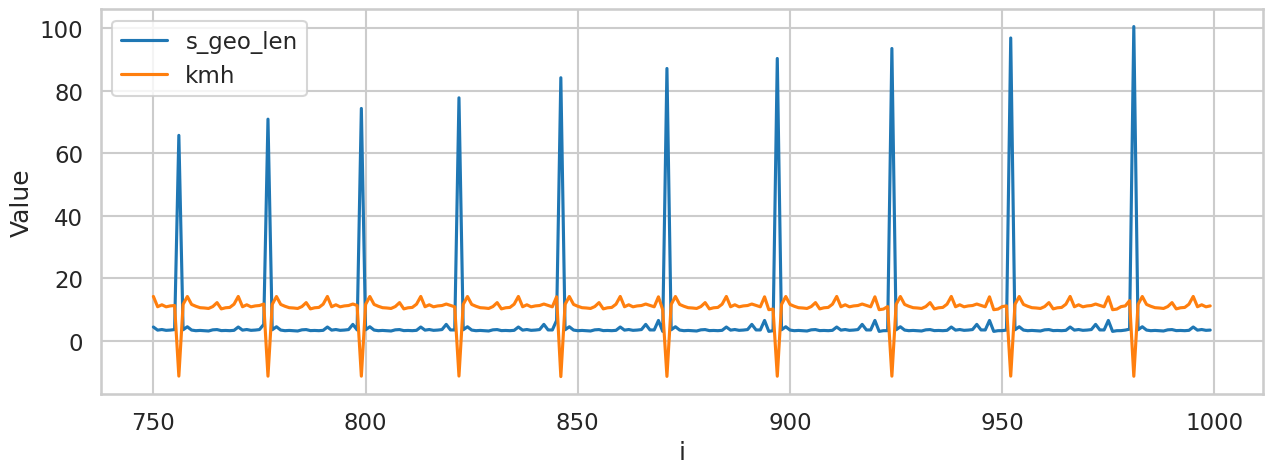

In [13]:
# Now you can use 's_geo_len' and 'kmh' for plotting using any plotting library like Matplotlib
# For example:
import matplotlib.pyplot as plt

# Assuming 'i_values' contains the corresponding values of 'i' (e.g., [2, 3])
fr = 750
to = min(1000, len(s_geo_len))
i_values = list(range(fr, to))

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(i_values, s_geo_len[fr:to], label='s_geo_len')
plt.plot(i_values, kmh[fr:to], label='kmh')
plt.xlabel('i')
plt.ylabel('Value')
plt.legend()
plt.show()

In [30]:
j = 0
loa = []
for i in range(700, 900):
    #print(f"{i:-3d},{j:-2d},{s_geo_len[i]:6.4f}")
    j = j+1
    if (s_geo_len[i]>20):
        loa.append(j)
        print(f"{i},{j}")
        j = 0

756,57
777,21
799,22
822,23
846,24
871,25
897,26
